In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests as req
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# create url + key variable 
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key

In [3]:
# create latitudes and longitudes in arrays declared as variables, zip the lats and longs together in a new variable
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(latitudes, longitudes)
lat_lngs

In [4]:
# unpack lat_lngs into a list
coordinates = list(lat_lngs)


In [5]:
# Create a list for holding the cities
cities = []
# identify the nearest city for each latitude and longitude
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # add the city to cities if its not there already
    if city not in cities:
        cities.append(city)
# print count to confirm a sufficient count
len(cities)
    


637

In [6]:
# Create Empty List
city_data = []
# print the beginning of the logging
print('Beginning Data Retrieval    ')
print('-----------------------------')
# create counters
record_count = 1
set_count = 1
# iterate through the cities list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # create a url endpoint for each city
    city_url = url + '&q=' + city.replace(' ', '+')
    # log the url, record, set numbers, and city
    print(f'Processing Record {record_count} of set {set_count} | {city}')
     # Add one to the record count
    record_count +=1
    try:
        # parse json and retrieve the data
        weather_data = req.get(city_url).json()
        # parse out desired data
        city_lat = weather_data['coord']['lat']
        city_lng = weather_data['coord']['lon']
        city_max_temp = weather_data['main']['temp_max']
        city_humidity = weather_data['main']['humidity']
        city_clouds = weather_data['clouds']['all']
        city_wind = weather_data['wind']['speed']
        city_country = weather_data['sys']['country']
        # convert the date to ISO standard and format it
        city_date = datetime.utcfromtimestamp(weather_data['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append city inforation to city_data list
        city_data.append({'City': city.title(), 'Lat':city_lat, 'Lng':city_lng, 'Max Temp': city_max_temp, 'Humidity':city_humidity, 'Cloudiness':city_clouds, 'Wind Speed':city_wind, 'Country':city_country, 'Date':city_date})
    # if error is experienced
    except: 
        print('City not found Skipping....')
        pass
#indicate that data loading is complete
print('---------------------------')
print('Data Retrieval Complete    ')
print('---------------------------')
        
        

Beginning Data Retrieval    
-----------------------------
Processing Record 1 of set 1 | concordia
Processing Record 2 of set 1 | ust-tsilma
Processing Record 3 of set 1 | nouakchott
Processing Record 4 of set 1 | taolanaro
City not found Skipping....
Processing Record 5 of set 1 | qaqortoq
Processing Record 6 of set 1 | hualmay
Processing Record 7 of set 1 | atuona
Processing Record 8 of set 1 | saskylakh
Processing Record 9 of set 1 | porteirinha
Processing Record 10 of set 1 | galiwinku
City not found Skipping....
Processing Record 11 of set 1 | avarua
Processing Record 12 of set 1 | mount isa
Processing Record 13 of set 1 | mataura
Processing Record 14 of set 1 | sao luiz gonzaga
Processing Record 15 of set 1 | ushuaia
Processing Record 16 of set 1 | jamestown
Processing Record 17 of set 1 | nizhneyansk
City not found Skipping....
Processing Record 18 of set 1 | yarkovo
Processing Record 19 of set 1 | cherskiy
Processing Record 20 of set 1 | teluk nibung
Processing Record 21 of se

Processing Record 39 of set 4 | kalna
Processing Record 40 of set 4 | san roque
Processing Record 41 of set 4 | kongolo
Processing Record 42 of set 4 | partenit
Processing Record 43 of set 4 | manjeshwar
Processing Record 44 of set 4 | muros
Processing Record 45 of set 4 | kennett
Processing Record 46 of set 4 | jishu
Processing Record 47 of set 4 | neyshabur
Processing Record 48 of set 4 | guerrero negro
Processing Record 49 of set 4 | port alfred
Processing Record 50 of set 4 | tual
Processing Record 1 of set 5 | new norfolk
Processing Record 2 of set 5 | fare
Processing Record 3 of set 5 | aras
Processing Record 4 of set 5 | prince rupert
Processing Record 5 of set 5 | kiama
Processing Record 6 of set 5 | illoqqortoormiut
City not found Skipping....
Processing Record 7 of set 5 | batemans bay
Processing Record 8 of set 5 | okha
Processing Record 9 of set 5 | narsaq
Processing Record 10 of set 5 | pevek
Processing Record 11 of set 5 | heihe
Processing Record 12 of set 5 | sorong
Proc

Processing Record 25 of set 8 | zhanakorgan
Processing Record 26 of set 8 | tabou
Processing Record 27 of set 8 | mitsamiouli
Processing Record 28 of set 8 | ahipara
Processing Record 29 of set 8 | rawson
Processing Record 30 of set 8 | saint anthony
Processing Record 31 of set 8 | palu
Processing Record 32 of set 8 | kondratovo
Processing Record 33 of set 8 | koumac
Processing Record 34 of set 8 | mogok
Processing Record 35 of set 8 | cabo san lucas
Processing Record 36 of set 8 | dergachi
Processing Record 37 of set 8 | la ronge
Processing Record 38 of set 8 | waingapu
Processing Record 39 of set 8 | wakkanai
Processing Record 40 of set 8 | jinji
Processing Record 41 of set 8 | izumo
Processing Record 42 of set 8 | tadine
Processing Record 43 of set 8 | tarata
Processing Record 44 of set 8 | dalvik
Processing Record 45 of set 8 | mao
Processing Record 46 of set 8 | sattahip
Processing Record 47 of set 8 | beringovskiy
Processing Record 48 of set 8 | matagami
Processing Record 49 of s

Processing Record 12 of set 12 | ladario
Processing Record 13 of set 12 | warqla
City not found Skipping....
Processing Record 14 of set 12 | yanchukan
City not found Skipping....
Processing Record 15 of set 12 | san cristobal
Processing Record 16 of set 12 | huangzhai
Processing Record 17 of set 12 | half moon bay
Processing Record 18 of set 12 | lauingen
Processing Record 19 of set 12 | itoman
Processing Record 20 of set 12 | sitrah
Processing Record 21 of set 12 | sur
Processing Record 22 of set 12 | itoigawa
Processing Record 23 of set 12 | sungai siput utara
City not found Skipping....
Processing Record 24 of set 12 | namatanai
Processing Record 25 of set 12 | lubao
Processing Record 26 of set 12 | nizwa
Processing Record 27 of set 12 | ramsar
Processing Record 28 of set 12 | esperance
Processing Record 29 of set 12 | sola
Processing Record 30 of set 12 | washougal
Processing Record 31 of set 12 | mosquera
Processing Record 32 of set 12 | pinega
Processing Record 33 of set 12 | kr

In [7]:
# check the length of city_data
len(city_data)

576

In [8]:
# convert array to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Concordia,-31.3930,-58.0209,86.07,66,100,16.11,AR,2022-01-24 16:39:32
1,Ust-Tsilma,65.4410,52.1498,21.83,93,100,10.42,RU,2022-01-24 16:39:33
2,Nouakchott,18.0858,-15.9785,89.53,22,99,15.90,MR,2022-01-24 16:36:39
3,Qaqortoq,60.7167,-46.0333,30.70,92,100,7.72,GL,2022-01-24 16:39:33
4,Hualmay,-11.0964,-77.6139,76.71,72,43,9.89,PE,2022-01-24 16:39:34
5,Atuona,-9.8000,-139.0333,78.12,76,9,18.05,PF,2022-01-24 16:39:34
6,Saskylakh,71.9167,114.0833,-13.04,96,97,5.10,RU,2022-01-24 16:39:34
7,Porteirinha,-15.7433,-43.0283,84.94,52,68,5.55,BR,2022-01-24 16:39:35
8,Avarua,-21.2078,-159.7750,78.85,94,3,12.66,CK,2022-01-24 16:36:45
9,Mount Isa,-20.7333,139.5000,74.97,100,75,8.05,AU,2022-01-24 16:39:36


In [9]:
# create proper column order list and reorder city_data_df columns with it
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Concordia,AR,2022-01-24 16:39:32,-31.3930,-58.0209,86.07,66,100,16.11
1,Ust-Tsilma,RU,2022-01-24 16:39:33,65.4410,52.1498,21.83,93,100,10.42
2,Nouakchott,MR,2022-01-24 16:36:39,18.0858,-15.9785,89.53,22,99,15.90
3,Qaqortoq,GL,2022-01-24 16:39:33,60.7167,-46.0333,30.70,92,100,7.72
4,Hualmay,PE,2022-01-24 16:39:34,-11.0964,-77.6139,76.71,72,43,9.89
5,Atuona,PF,2022-01-24 16:39:34,-9.8000,-139.0333,78.12,76,9,18.05
6,Saskylakh,RU,2022-01-24 16:39:34,71.9167,114.0833,-13.04,96,97,5.10
7,Porteirinha,BR,2022-01-24 16:39:35,-15.7433,-43.0283,84.94,52,68,5.55
8,Avarua,CK,2022-01-24 16:36:45,-21.2078,-159.7750,78.85,94,3,12.66
9,Mount Isa,AU,2022-01-24 16:39:36,-20.7333,139.5000,74.97,100,75,8.05


In [10]:
# Create output file
output_path = 'weather_data/cities.csv'
# save dataframe to output csv
city_data_df.to_csv(output_path, index_label='City_ID')

In [13]:
# Extract Relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

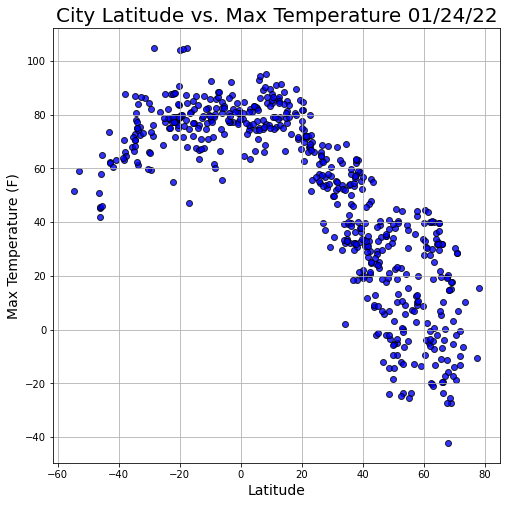

In [25]:
# build the scatter plot for lat v max temp
plt.figure(figsize=(8,8))
plt.scatter(lats, max_temps, edgecolor='k', facecolor='blue', marker='o', alpha=0.8, linewidths=1, label='Cities')
plt.title('City Latitude vs. Max Temperature ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig1.png')




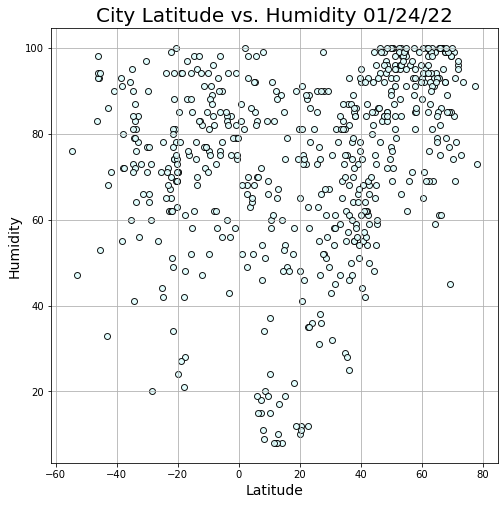

In [26]:
# build the scatter plot for lat v humidity
plt.figure(figsize=(8,8))
plt.scatter(lats, humidity, edgecolor='k', facecolor='lightcyan', marker='o', alpha=0.9, linewidths=1, label='Cities')
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig2.png')


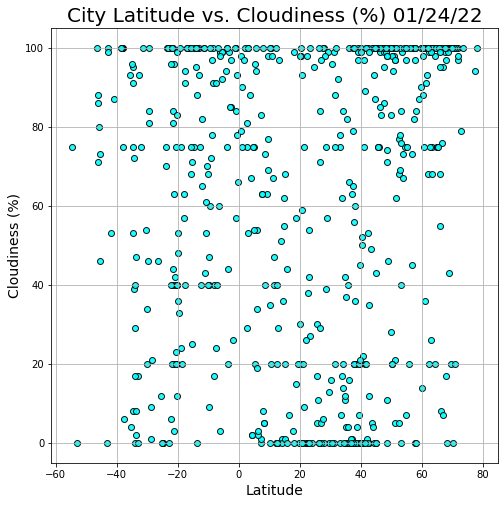

In [29]:
# build the scatter plot for lat v cloudiness
plt.figure(figsize=(8,8))
plt.scatter(lats, cloudiness, edgecolor='k', facecolor='aqua', marker='o', alpha=0.9, linewidths=1, label='Cities')
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig3.png')

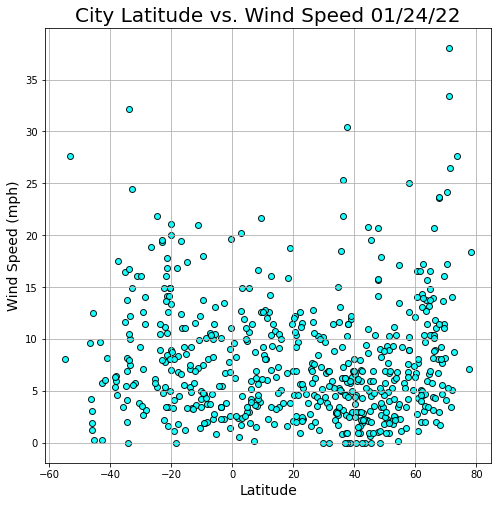

In [30]:
# build the scatter plot for lat v wind speed
plt.figure(figsize=(8,8))
plt.scatter(lats, wind_speed, edgecolor='k', facecolor='aqua', marker='o', alpha=0.9, linewidths=1, label='Cities')
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig4.png')